In [1]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten

In [2]:
IMAGE_SIZE=[224,224]

In [3]:
train_path=r'C:\Users\HP\OneDrive\Desktop\Mask\Train'
test_path=r'C:\Users\HP\OneDrive\Desktop\Mask\Test'

In [4]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [5]:
#dont traIn vgg16
for layer in vgg.layers:
  layer.trainable=False

In [6]:
x=Flatten()(vgg.output)
prediction=Dense(2,activation='softmax')(x)

In [7]:
from keras.models import Model
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')


Found 3150 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [10]:
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=5)

C:\Users\HP\AppData\Local\Temp\ipykernel_10052\1791947654.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,


Epoch 1/5
34/99 [=========>....................] - ETA: 10:20 - loss: 0.5159 - accuracy: 0.8079

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 [==============================] - 1037s 10s/step - loss: 0.2463 - accuracy: 0.9092 - val_loss: 0.0419 - val_accuracy: 0.9804
Epoch 2/5
99/99 [==============================] - 1045s 11s/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 3/5
99/99 [==============================] - 1046s 11s/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 4/5
99/99 [==============================] - 1056s 11s/step - loss: 0.0352 - accuracy: 0.9879 - val_loss: 0.0293 - val_accuracy: 0.9804
Epoch 5/5
99/99 [==============================] - 1183s 12s/step - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.0334 - val_accuracy: 0.9804


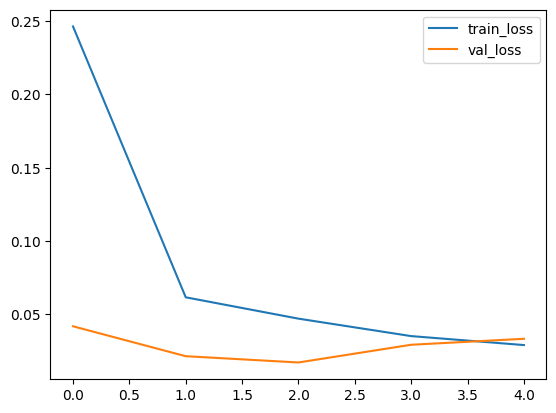

In [11]:
#plot of loss,that why the model is stored in r
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


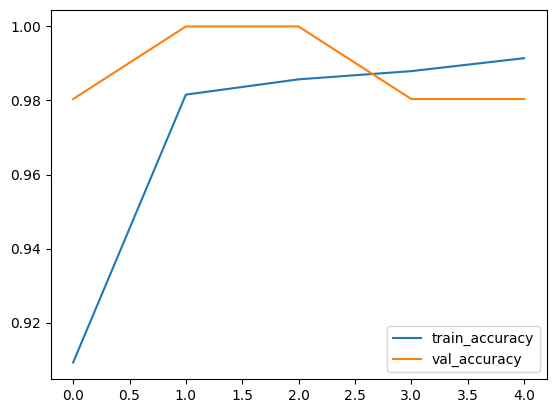

In [12]:
#plot of accurcay
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_new(imgpath, model):
    image = cv2.imread(imgpath)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.show()    
    image_resized = cv2.resize(image, (224, 224))
    img = image_resized.reshape(1, 224, 224, 3)
    pred = model.predict(img)
    ind = np.argmax(pred)
    if ind == 0:
        print('wearing mask')
    else:
        print('without mask')



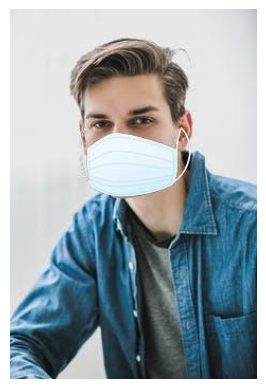

1/1 [==============================] - 0s 322ms/step
wearing mask


In [21]:
image_path=r'C:\Users\HP\OneDrive\Desktop\Mask\Test\with_mask1\10-with-mask.jpg'
predict_new(image_path,model)

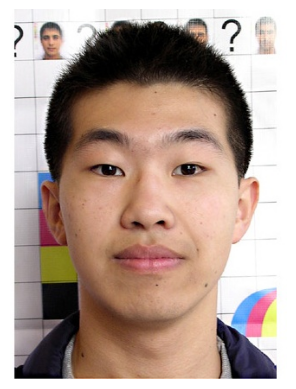

1/1 [==============================] - 0s 364ms/step
without mask


In [25]:
image_path=r'C:\Users\HP\OneDrive\Desktop\Mask\Test\without_mask1\40.jpg'
predict_new(image_path,model)

In [16]:
import pickle

# Save the entire Keras model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
